## ♠ ♠ ♠ Stage III ♠ ♠ ♠
## _'Predict, predict and predict!'_

Well _dataAnalyst_player1_, if you achieved this level, it means you are more persistent than I expected.
Just be more careful with this level since many people get strugling here. 
Clear your mind, and predict with these machine learning algorithms:

* Predic with trees
* Bagging
* Random Forest
* Boosting
* Model based prediction



 Predicting with trees 


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"


    setosa versicolor  virginica 
        50         50         50 

[1] 105   5

[1] 45  5

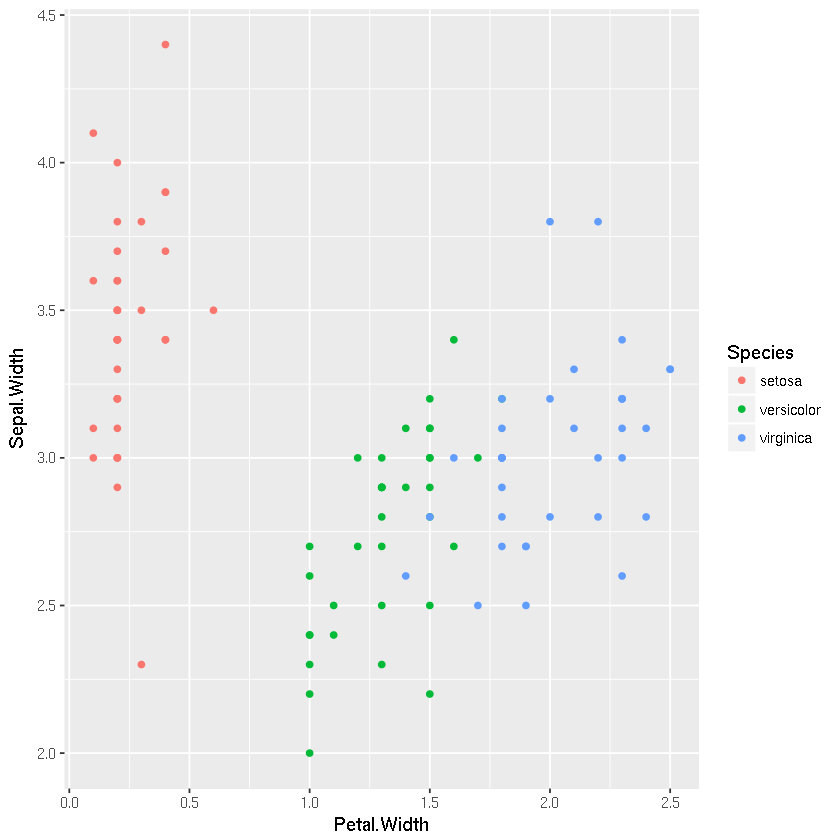

In [4]:
#==============================================
#================ Week 3 ================
#============================================
#Predicting with trees, Random Forests, & Model Based Predictions
library(caret)
#week3_I_Predicting with trees

cat ("\n===================================\n Predicting with trees \n===================================\n")

#Example: Iris Data
data(iris); library(ggplot2)
names(iris)

table(iris$Species)

#Create training and test sets
inTrain <- createDataPartition(y=iris$Species, 
                               p=0.7,
                               list=FALSE)
training <- iris[inTrain,]
testing <-iris[-inTrain,]
dim(training);
dim(testing)

#Iris petal widths/sepal width

qplot(Petal.Width,
      Sepal.Width,
      colour=Species, 
      data=training)




modFit ~ finalModel


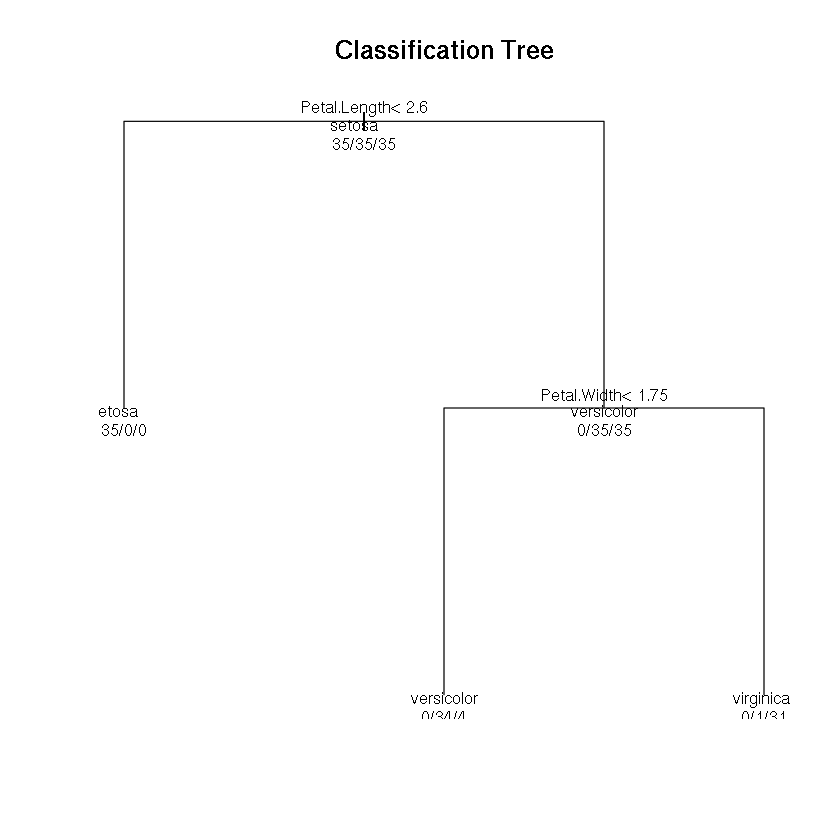

In [7]:
#Iris petal widths/sepal width
library(caret)
modFit <- train(Species ~ .,method="rpart", data=training)
print(modFit~finalModel)

#Plot tree
plot(modFit$finalModel, uniform = TRUE, main= "Classification Tree")
text(modFit$finalModel, use.n=TRUE, all=TRUE, cex=.8)


In [1]:
#prettier plots
install.packages("RGtk2")
install.packages("cairoDevice")
install.packages("rattle")
#install.packages("rattle")
library(rattle)
library()
fancyRpartPlot(modFit$finalModel)

#Predicting new values
predict(modFit, newdata=testing)

Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message in install.packages("RGtk2"):
“installation of package ‘RGtk2’ had non-zero exit status”Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message in install.packages("cairoDevice"):
“installation of package ‘cairoDevice’ had non-zero exit status”Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘RGtk2’, ‘cairoDevice’

Warning message in install.packages("rattle"):
“installation of package ‘RGtk2’ had non-zero exit status”Warning message in install.packages("rattle"):
“installation of package ‘cairoDevice’ had non-zero exit status”Warning message in install.packages("rattle"):
“installation of package ‘rattle’ had non-zero exit status”

ERROR: Error in library(rattle): there is no package called ‘rattle’


**Notes**
* Classification trees are non-linear models
 * They use interactions between variables
 * Data transformations may be less important (monotone transoformations)
 * Trees can also be used for regression problems (continuous outcome)
* Note that there are multiple tree building options in R both in the caret package - party, rpart and out of the caret package -tree

Read further...
* Introduction to statistical learning
* Elements of Statistical Learning
* Classification and regression trees


 Bagging 


,ozone,radiation,temperature,wind
17,1,8,59,9.7
19,4,25,61,9.7
14,6,78,57,18.4
45,7,48,80,14.3
106,7,49,69,10.3
7,8,19,61,20.1


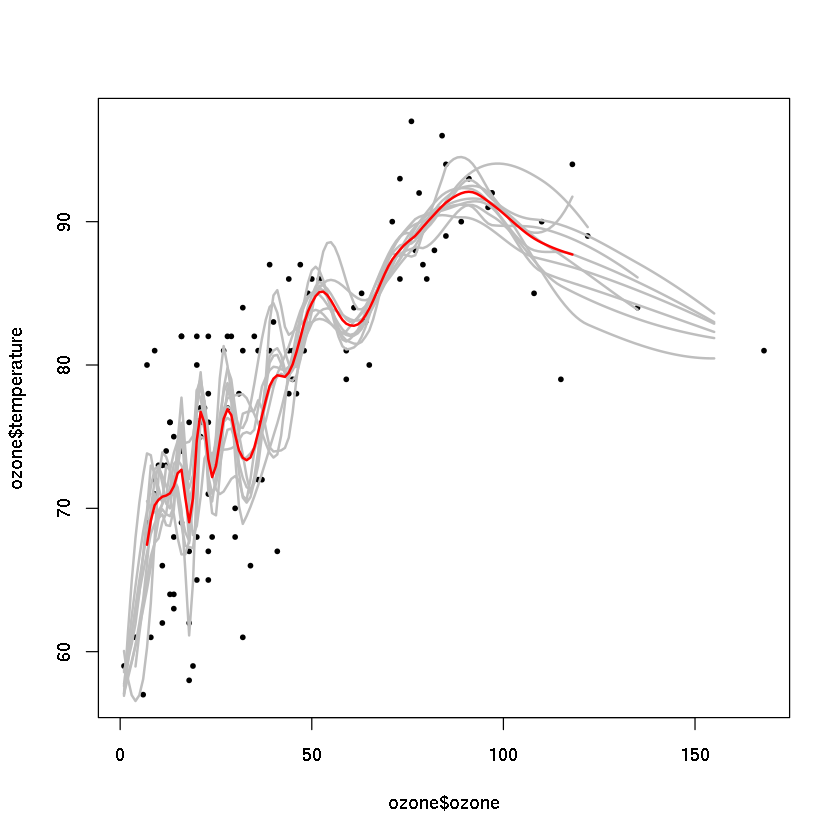

In [6]:
#week3_II_Bagging
cat ("\n===================================\n Bagging \n===================================\n")
#install.packages("ElemStatLearn")
library(ElemStatLearn);
data(ozone, package="ElemStatLearn")
ozone <- ozone[order(ozone$ozone),]
head(ozone)

#Bagged loess

ll <- matrix(NA, nrow=10, ncol=155)

for(i in 1:10){
  ss <- sample(1:dim(ozone)[1], replace=T)
  ozone0 <-ozone[ss,];
  ozone0 <- ozone0[order(ozone0$ozone),]
  loess0 <- loess(temperature ~ ozone, data=ozone0, span=0.2)
  ll[i,] <- predict(loess0, newdata=data.frame(ozone=1:155))
}

#Bagged loess
plot(ozone$ozone, ozone$temperature, pch=19, cex=0.5)
for(i in 1:10){lines(1:155, ll[i,], col="grey", lwd=2)}
lines(1:155, apply(ll, 2, mean), col="red", lwd=2)



Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘TH.data’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘sandwich’




Bagging in caret
So bootstrap aggregating has a very simple idea.
The basic idea is take your data and take resamples of the data set.
So, this is the similar to the idea of bootstrapping, which you would have
learned about in the inference class that
is part of the data science specialization.
After you resample the cases with replacement, then
you recalculate your prediction function on that resampled data.
And then you either average the
predictions from all these repeated predictors that
you built or you majority vote or
something like that when you're doing classification.
The thing is that you get a similar bias that you would get from fitting any one
of those models individually, but a reduced variability
because you've averaged a bunch of different predictors together.
This is most useful for non-linear functionsPlotting...

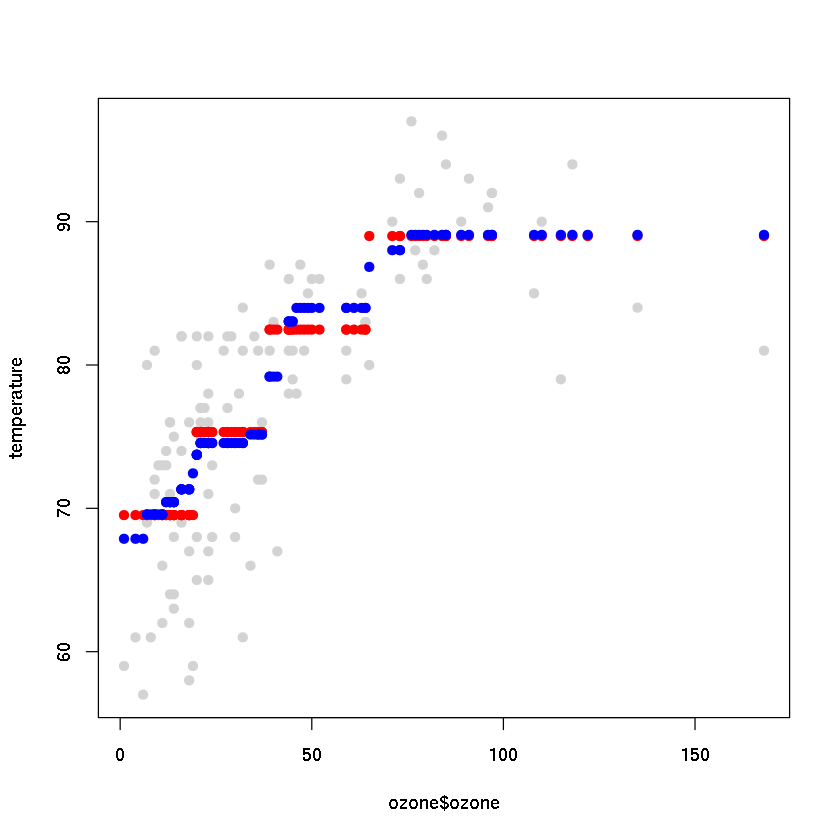

In [10]:
library(caret)
install.packages("party")
library(party)
cat("\nBagging in caret\n")
cat("So bootstrap aggregating has a very simple idea.
The basic idea is take your data and take resamples of the data set.
So, this is the similar to the idea of bootstrapping, which you would have
learned about in the inference class that
is part of the data science specialization.
After you resample the cases with replacement, then
you recalculate your prediction function on that resampled data.
And then you either average the
predictions from all these repeated predictors that
you built or you majority vote or
something like that when you're doing classification.
The thing is that you get a similar bias that you would get from fitting any one
of those models individually, but a reduced variability
because you've averaged a bunch of different predictors together.
This is most useful for non-linear functions")
predictors= data.frame(ozone=ozone$ozone)
temperature= ozone$temperature
treebag <- bag(predictors, temperature, B=10, 
               bagControl = bagControl(fit=ctreeBag$fit,
                                       predict=ctreeBag$pred, 
                                       aggregate = ctreeBag$aggregate))

#Example of custom bagging(continued)
cat("Plotting...")
plot(ozone$ozone, temperature, col = "lightgrey", pch=19)
points(ozone$ozone,predict(treebag$fits[[1]]$fit, predictors), pch=19, col="red")
points(ozone$ozone,predict(treebag, predictors), pch=19, col="blue")




In [12]:
cat("\nParts of bagging\n\nFit:")
#Parts of bagging
ctreeBag$fit
cat("\npred\n\n")
ctreeBag$pred
cat("\naggregate\n\n")

ctreeBag$aggregate



Parts of bagging

Fit:

function (x, y, ...) 
{
    loadNamespace("party")
    data <- as.data.frame(x)
    data$y <- y
    party::ctree(y ~ ., data = data)
}
<environment: namespace:caret>


pred



function (object, x) 
{
    if (!is.data.frame(x)) 
        x <- as.data.frame(x)
    obsLevels <- levels(object@data@get("response")[, 1])
    if (!is.null(obsLevels)) {
        rawProbs <- party::treeresponse(object, x)
        probMatrix <- matrix(unlist(rawProbs), ncol = length(obsLevels), 
            byrow = TRUE)
        out <- data.frame(probMatrix)
        colnames(out) <- obsLevels
        rownames(out) <- NULL
    }
    else out <- unlist(party::treeresponse(object, x))
    out
}
<environment: namespace:caret>


aggregate



function (x, type = "class") 
{
    if (is.matrix(x[[1]]) | is.data.frame(x[[1]])) {
        pooled <- x[[1]] & NA
        classes <- colnames(pooled)
        for (i in 1:ncol(pooled)) {
            tmp <- lapply(x, function(y, col) y[, col], col = i)
            tmp <- do.call("rbind", tmp)
            pooled[, i] <- apply(tmp, 2, median)
        }
        if (type == "class") {
            out <- factor(classes[apply(pooled, 1, which.max)], 
                levels = classes)
        }
        else out <- as.data.frame(pooled)
    }
    else {
        x <- matrix(unlist(x), ncol = length(x))
        out <- apply(x, 1, median)
    }
    out
}
<environment: namespace:caret>


 Random forest 
The basic idea is very similar to bagging in the sense that we bootstrap
samples, so we take a resample of our observed data, and our training data set.
And then we rebuild classification or regression
trees on each of those bootstrap samples.
The one difference is that at each split, when we split the
data each time in a classification tree, we also bootstrap the variables.
In other words, only a subset of
the variables is considered at each potential split.
This makes for a diverse set of potential trees that can be built.
And so the idea is we grow a large number of trees.
And then we either vote or average those trees
in order to get the prediction for a new outcome.
The pros for this approach are that it's quite accurate.
And along with boosting, it's one of the most, widely
used and highly accurate methods for prediction in competitions like Kaggle.
The cons are that it's, it can be quite slow.
It has to build a large number of trees.
And it can be hard to interp

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 105, 105, 105, 105, 105, 105, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9458051  0.9175234
  3     0.9480072  0.9209931
  4     0.9426226  0.9127852

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,3,2.70,1,0
2,0,0,0,0.00,-1,1
3,4,5,3,4.75,1,0
4,6,7,1,5.05,1,0
5,8,9,3,5.05,1,0
6,0,0,0,0.00,-1,3
7,0,0,0,0.00,-1,2
8,10,11,2,3.10,1,0
9,0,0,0,0.00,-1,3
10,12,13,4,1.75,1,0


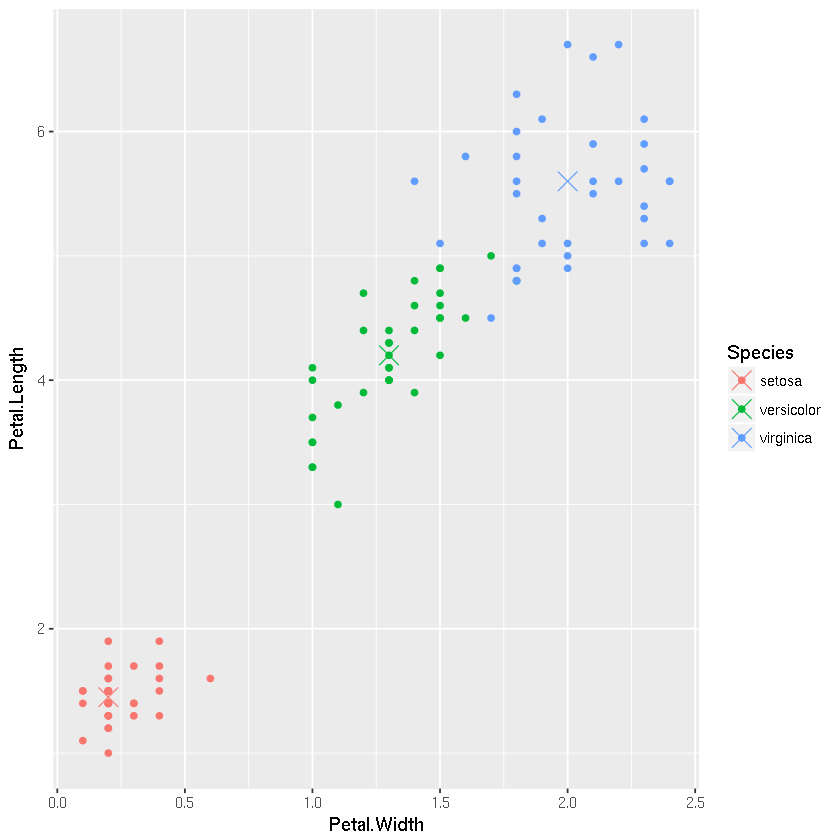

In [14]:
#week3_III_RandomForest
cat ("\n===================================\n Random forest \n===================================\n")
cat("The basic idea is very similar to bagging in the sense that we bootstrap
samples, so we take a resample of our observed data, and our training data set.
And then we rebuild classification or regression
trees on each of those bootstrap samples.
The one difference is that at each split, when we split the
data each time in a classification tree, we also bootstrap the variables.
In other words, only a subset of
the variables is considered at each potential split.
This makes for a diverse set of potential trees that can be built.
And so the idea is we grow a large number of trees.
And then we either vote or average those trees
in order to get the prediction for a new outcome.
The pros for this approach are that it's quite accurate.
And along with boosting, it's one of the most, widely
used and highly accurate methods for prediction in competitions like Kaggle.
The cons are that it's, it can be quite slow.
It has to build a large number of trees.
And it can be hard to interpret, in the sense that
you might have a large number of trees that are averaged together.
And those trees represent bootstrap samples with bootstrap nodes
that can be a little bit complicated to understand.
It can also lead to a little bit of overfitting
which can be complicated by the fact that it's very hard
to understand which trees are leading to that overfitting, and so
it's very important to use cross validation when building random forests.")

data(iris);
library(ggplot2);

inTrain <- createDataPartition(y=iris$Species,
                               p=0.7,
                               list=FALSE)

training <- iris[inTrain,]
testing <- iris[-inTrain,]

#Random forest
library(caret)
library(randomForest)
modFit <- train(Species~., data=training, method="rf", prox=TRUE)

modFit

#getting a single tree
getTree(modFit$finalModel, k=2)

#Class 'centers'

irisP <- classCenter(training[,c(3,4)], training$Species, modFit$finalModel$prox)
irisP <- as.data.frame(irisP);
irisP$Species <- rownames(irisP)
p <- qplot(Petal.Width, Petal.Length, col = Species, data=training)
p+ geom_point(aes(x=Petal.Width, y =Petal.Length, col=Species) ,size =5, shape=4, data=irisP)





Predicting new values:

            
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1        14


Ploting the predicted new values


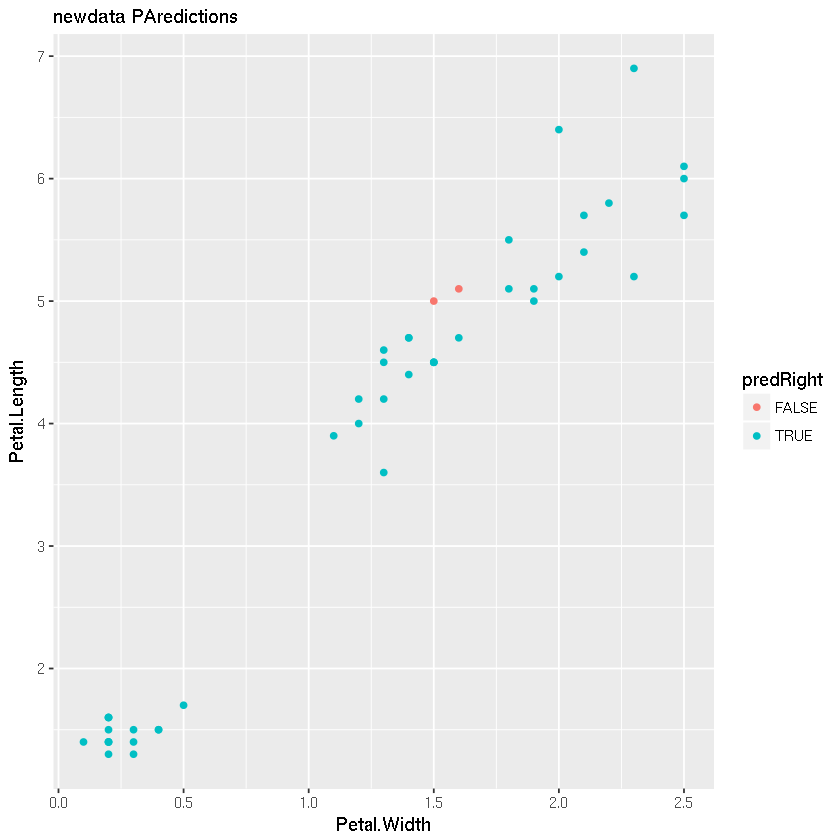

In [15]:

cat("\n\nPredicting new values:")
pred <- predict(modFit, testing);
testing$predRight <- pred== testing$Species
table(pred, testing$Species)

cat("\nPloting the predicted new values\n")
qplot(Petal.Width, Petal.Length, colour=predRight, data=testing, main="newdata PAredictions")



 Boosting 
This lecture is about Boosting, which along with random forest, is one
of the most accurate out of the box classifiers that you can use.
The basic idea here is, take a large number
of possibly weak predictors, and we're going to take those
possibly weak predictors, and weight them in a way,
that takes advantage of their strengths, and add them up.
When we weight them and add them up, we're sort of doing
the same kind of idea that we did with bagging for regression trees.
Or that we did with random forest, where we're talking
a large number of classifiers and sort of averaging them.
And then, by averaging them together, we get a stronger predictor.
So the basic idea here is to take k classifiers.
These come from, usually, from the same kind of class of classifiers.
And so, some ideas might be using all
possible classification trees, or all possible regression models.
Or all possible cutoffs, where you just.
Divide the data into different points.
You then create a classifier 

Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "wage"

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "ber

“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset =

“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset =

“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offs

“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset =

“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset =

“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offse

“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, 

“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y

“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset =

“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 14: region2. Middle Atlantic has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 15: region3. East North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 16: region4. West North Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 17: region5. South Atlantic has no variation.”Warning message in (function (x, y, offset =

“variable 18: region6. East South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 19: region7. West South Central has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: region8. Mountain has no variation.”Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 21: region9. Pacific has no variation.”

Stochastic Gradient Boosting 

2102 samples
   9 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2102, 2102, 2102, 2102, 2102, 2102, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      34.84623  0.3014784  23.79997
  1                  100      34.42192  0.3097607  23.48664
  1                  150      34.39590  0.3109083  23.48580
  2                   50      34.37591  0.3124417  23.38636
  2                  100      34.39925  0.3112898  23.44882
  2                  150      34.53321  0.3079632  23.55859
  3                   50      34.36651  0.3119140  23.40141
  3                  100      34.56116  0.3070457  23.58708
  3                  150      34.79190  0.3008456  23.78051

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optimal mo

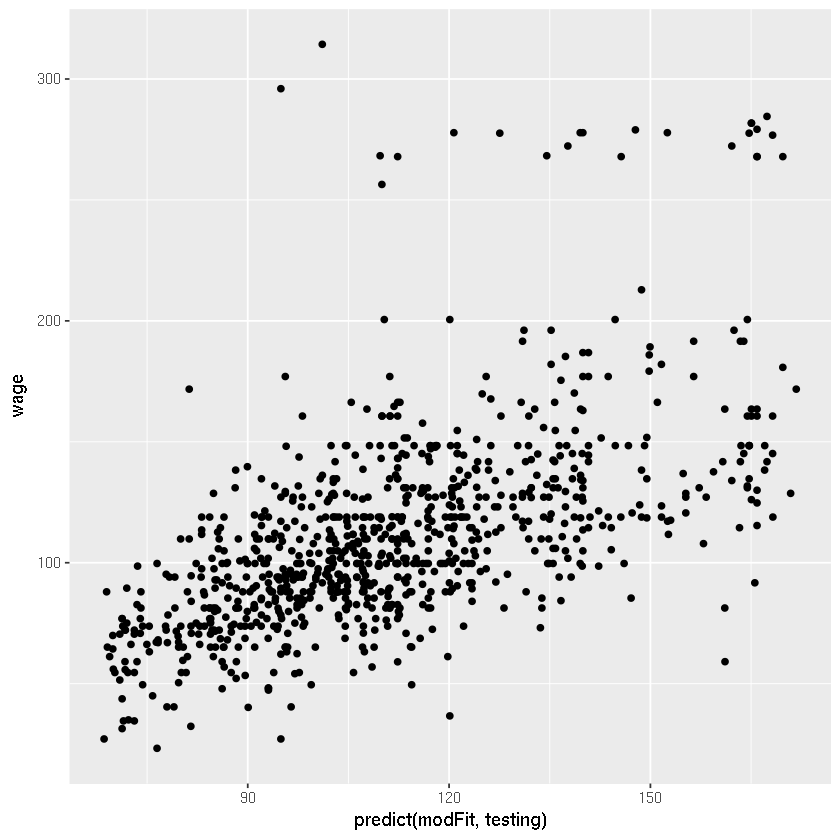

In [23]:
#week3_IV_Boosting
cat ("\n===================================\n Boosting \n===================================\n")

cat("This lecture is about Boosting, which along with random forest, is one
of the most accurate out of the box classifiers that you can use.
The basic idea here is, take a large number
of possibly weak predictors, and we're going to take those
possibly weak predictors, and weight them in a way,
that takes advantage of their strengths, and add them up.
When we weight them and add them up, we're sort of doing
the same kind of idea that we did with bagging for regression trees.
Or that we did with random forest, where we're talking
a large number of classifiers and sort of averaging them.
And then, by averaging them together, we get a stronger predictor.
So the basic idea here is to take k classifiers.
These come from, usually, from the same kind of class of classifiers.
And so, some ideas might be using all
possible classification trees, or all possible regression models.
Or all possible cutoffs, where you just.
Divide the data into different points.
You then create a classifier that combines
these classification functions together, and weights them together.
So, alpha sub t here is a weight times the classifier ht of x, and so this weighted
set of classifiers, gives you a prediction for the new point, that's our f of x.
The goal here is to minimize error on the training set.
And so this is iterative at each step we take, exactly one h.
We calculate weights for the next step, based on
the errors that we get from that original h.
And then we upweight missed classifications, and
select the next stage and move on.
The most famous boosting algorithm is probably Adaboost,
and here you can read about it on Wikipedia.
You can also read this very nice tutorial on boosting here, that will
also give us some of the material for the rest of these lecture notes. ")

#Wage example
#install.packages("gbm")
library(gbm);
library(ISLR);
library(ggplot2);
library(caret);
data(Wage);

Wage <- subset(Wage, select=-c(logwage))
inTrain <- createDataPartition(y=Wage$wage,
                               p=0.7,
                               list=FALSE)
training <- Wage[inTrain,];
testing <- Wage[-inTrain,]
colnames(training)
#Fit the model
modFit <- train(wage~. , method="gbm", data=training, verbose=FALSE)
print(modFit)

#Plot the results
cat("\nPlotting the results\n")
qplot(predict(modFit, testing), wage, data=testing)



 Model Based Prediction 

The basic idea here is that we're going to
assume the data follow a specific probabilistic model.
Then we're going to use base therom to
identify optimal classifiers based on that probabilistic model.
The advantage is that this approach can take advantage
of some structure that might appear in the data.
For example the fall of distribution.
And that may lead to some computational conveniences.
There may also be reasonable accurate
on real problems, particularly the real problems
that appear to follow the data distribution
that under lies our whole holistic model.
The cons are that they do make
these additional assumptions about the data, and they
don't have to be exactly satisfied in order
for the prediction algorithms to work very well.
But if they're very far off, the algorithms may fail.
And when the model is incorrect, you do get reduced accuracy.


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"


    setosa versicolor  virginica 
        50         50         50 

[1] 105   5

[1] 45  5

            pnb
plda         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         0
  virginica       0          1        13

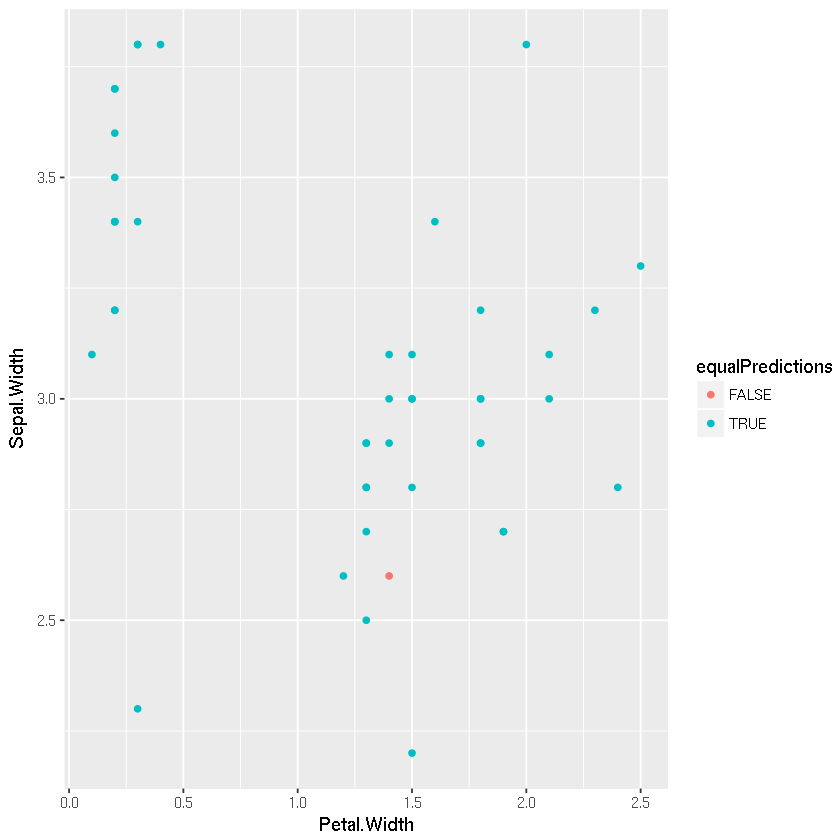

In [28]:
#week3_V_ModelBasedPrediction
cat ("\n===================================\n Model Based Prediction \n===================================\n")
cat("\nThe basic idea here is that we're going to
assume the data follow a specific probabilistic model.
Then we're going to use base therom to
identify optimal classifiers based on that probabilistic model.
The advantage is that this approach can take advantage
of some structure that might appear in the data.
For example the fall of distribution.
And that may lead to some computational conveniences.
There may also be reasonable accurate
on real problems, particularly the real problems
that appear to follow the data distribution
that under lies our whole holistic model.
The cons are that they do make
these additional assumptions about the data, and they
don't have to be exactly satisfied in order
for the prediction algorithms to work very well.
But if they're very far off, the algorithms may fail.
And when the model is incorrect, you do get reduced accuracy.\n")
#Example: Iris data
data(iris);
library(ggplot2);
#install.packages("klaR")
library(klaR)
library(caret);
#install.packages("MASS")
library(MASS)
names(iris)


table(iris$Species)
#create training and test sets
inTrain <- createDataPartition(y=iris$Species,
                               p=0.7,
                               list=FALSE)
training <- iris[inTrain,]
testing  <- iris[-inTrain,]
dim(training);
dim(testing)

#Build predictions
modlda = train(Species~., data=training, method="lda")
modlnb = train(Species~., data=training, method="nb")
plda = predict(modlda, testing);
pnb = predict(modlnb, testing)
table(plda, pnb)

#Comparison of results
equalPredictions = (plda == pnb)
qplot(Petal.Width, Sepal.Width, colour=equalPredictions, data=testing)

